In [2]:
import numpy as np
import sympy
from sympy import Symbol
import matplotlib.pyplot as plt

# 1. Random Walks

https://ko.wikipedia.org/wiki/%EB%AC%B4%EC%9E%91%EC%9C%84_%ED%96%89%EB%B3%B4

#### (a) 1차원 랜덤워크 모형을 시뮬레이션으로 구현하여라. 구체적으로 1차원 격자에서 왼쪽으로 움직일 확률이 1/2, 오른쪽으로 움직일 확률이 1/2로 가정하자. 그리고 $t$시간이 지난 후에 입자가 존재하는 위치를 구하는 코드를 작성하여라. 초기에 입자는 원점에 존재하며 매 타임스텝마다 1번씩 움직인다. (몬테카를로 시뮬레이션)


In [102]:
prob = [0.5,0.5]

In [103]:
start = 0
positions = [start]

In [110]:
T = np.random.random(1000) # 1000시간씩 계산하는 코드를 작성했습니다. 즉, 이 코드를 3번 적용하면 3000시간 후의 위치를 표현하게 됩니다.
downp = T < prob[0]
upp = T > prob[1]

for idownp, iupp in zip(downp, upp):
    down = idownp and positions[-1] > -10
    up = iupp and positions[-1] < 10 # -10에서 10까지의 위치 범위를 두었습니다.
    positions.append(positions[-1] - down + up)

#### (b) 이러한 시행을 충분히 많이 시행하여서 $t$시간 후에 입자가 특정 위치에 존재하는 확률 분포를 구하여라. (파이썬 기초)

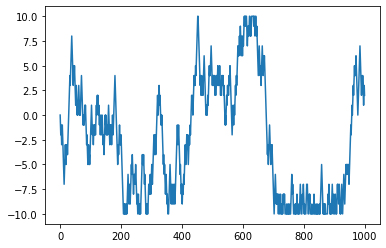

In [105]:
# 1000시간
plt.plot(positions)
plt.show()

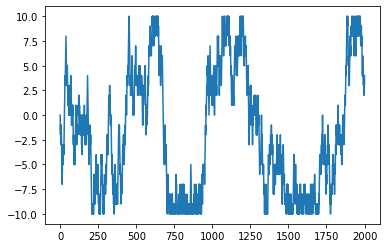

In [107]:
#2000시간
plt.plot(positions)
plt.show()

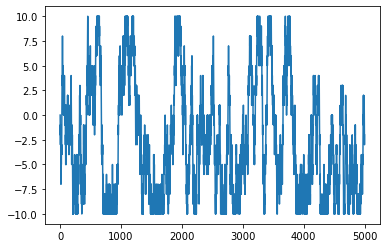

In [111]:
#5000시간
plt.plot(positions)
plt.show()

# 2. Bifurcation

다음으로 주어지는 미분방정식이 있다.$$ \frac{dx}{dt}= rx-x^2. $$

### (a) 이 방정식을 다음의 조건에서 풀고 궤적을 그려라. (미분방정식)

1. r=-1, x(0)=2
2. r=-1, x(0)=-2
3. r=1, x(0)=2
4. r=1, x(0)=-2


In [119]:
t = sympy.symbols('t')
x = sympy.Function('x') 
x(t)

x(t)

In [120]:
x(t).diff(t)

Derivative(x(t), t)

In [121]:
# 1번
eq = sympy.Eq(x(t).diff(t),-x(t)-x(t)**2)

In [122]:
sympy.dsolve(sympy.Eq(x(t).diff(t),-x(t)-x(t)**2),x(t))

Eq(x(t), -C1/(C1 - exp(t)))

In [123]:
psol1 = sympy.dsolve( eq, ics= {x(0):2} )
psol1

Eq(x(t), -2/(3*(2/3 - exp(t))))

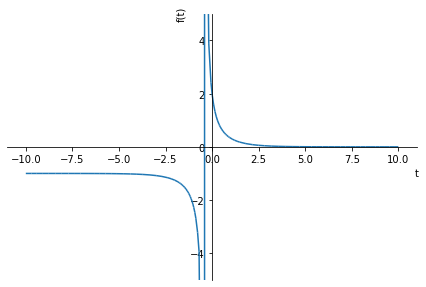

In [152]:
sympy.plot(psol1.rhs, ylim=(-5,5))

In [125]:
# 2번
eq = sympy.Eq(x(t).diff(t),-x(t)-x(t)**2)

In [126]:
sympy.dsolve(sympy.Eq(x(t).diff(t),-x(t)-x(t)**2),x(t))

Eq(x(t), -C1/(C1 - exp(t)))

In [142]:
psol2 = sympy.dsolve( eq, ics= {x(0):-2} )
psol2

Eq(x(t), 1/(1 - 3*exp(-t)/2))

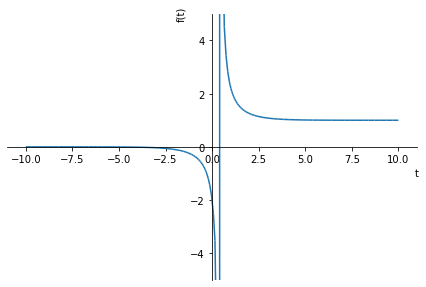

In [151]:
sympy.plot(psol2.rhs, ylim=(-5,5))

In [130]:
# 3번
eq = sympy.Eq(x(t).diff(t),x(t)-x(t)**2)

In [131]:
sympy.dsolve(sympy.Eq(x(t).diff(t),x(t)-x(t)**2),x(t))

Eq(x(t), 1/(C1*exp(-t) + 1))

In [144]:
psol3 = sympy.dsolve( eq, ics= {x(0):2} )
psol3

Eq(x(t), 1/(1 - exp(-t)/2))

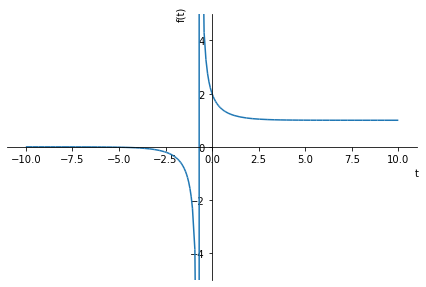

In [150]:
sympy.plot(psol3.rhs, ylim=(-5,5))

In [135]:
# 4번
eq = sympy.Eq(x(t).diff(t),x(t)-x(t)**2)

In [136]:
sympy.dsolve(sympy.Eq(x(t).diff(t),x(t)-x(t)**2),x(t))

Eq(x(t), 1/(C1*exp(-t) + 1))

In [146]:
psol4 = sympy.dsolve( eq, ics= {x(0):-2} )
psol4

Eq(x(t), 1/(1 - 3*exp(-t)/2))

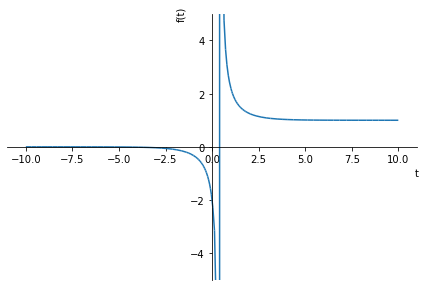

In [149]:
sympy.plot(psol4.rhs, ylim=(-5,5))

### (b) 정상상태(dx/dt=0)에서 가능한 해를 구하여라. (방정식)

즉, 다음의 조건에서 파이썬을 이용하여 방정식을 풀어라.
$$ 0= rx -x^2 = x( r-x) $$

1. r=-1
2. r=1

In [46]:
# 1번
x = Symbol("x")
sympy.solve(-x-x**2)

[-1, 0]

In [45]:
# 2번
sympy.solve(x-x**2)

[0, 1]